<a href="https://colab.research.google.com/github/SamBThach/Research-Project-1/blob/main/My_Copy_of_nurses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("ggrepel")
library(ggplot2)
library(ggrepel)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Nurses

This dataset comes from TidyTuesday, on 10/5/2021.

In [2]:
nurses <- read.csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-10-05/nurses.csv')

In [3]:
str(nurses)

'data.frame':	1242 obs. of  22 variables:
 $ State                                          : chr  "Alabama" "Alaska" "Arizona" "Arkansas" ...
 $ Year                                           : int  2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 ...
 $ Total.Employed.RN                              : int  48850 6240 55520 25300 307060 52330 33400 11410 10320 183130 ...
 $ Employed.Standard.Error....                    : num  2.9 13 3.7 4.2 2 2.8 6.5 11.4 1.2 2.2 ...
 $ Hourly.Wage.Avg                                : num  29 45.8 38.6 30.6 58 ...
 $ Hourly.Wage.Median                             : num  28.2 45.2 38 30 56.9 ...
 $ Annual.Salary.Avg                              : int  60230 95270 80380 63640 120560 77860 84850 74330 90050 69510 ...
 $ Annual.Salary.Median                           : int  58630 94070 79010 62330 118410 76500 82770 72110 89440 67510 ...
 $ Wage.Salary.standard.error....                 : num  0.8 1.4 0.9 1.4 1 0.7 1 2.5 1.5 0.7 ...
 $ Hourly.10th.Perce

In [4]:
nurses$State = nurses$State

## Check available data

In [5]:
table(nurses$State)


             Alabama               Alaska              Arizona 
                  23                   23                   23 
            Arkansas           California             Colorado 
                  23                   23                   23 
         Connecticut             Delaware District of Columbia 
                  23                   23                   23 
             Florida              Georgia                 Guam 
                  23                   23                   23 
              Hawaii                Idaho             Illinois 
                  23                   23                   23 
             Indiana                 Iowa               Kansas 
                  23                   23                   23 
            Kentucky            Louisiana                Maine 
                  23                   23                   23 
            Maryland        Massachusetts             Michigan 
                  23                   

In [6]:
table(nurses$Year)


1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 
  54   54   54   54   54   54   54   54   54   54   54   54   54   54   54   54 
2014 2015 2016 2017 2018 2019 2020 
  54   54   54   54   54   54   54 

There are 23 years worth of nursing info for each of the 50 states and 4 territories. 

## Graph 1: Median wage over time by state

Warning message:
“Removed 3 row(s) containing missing values (geom_path).”


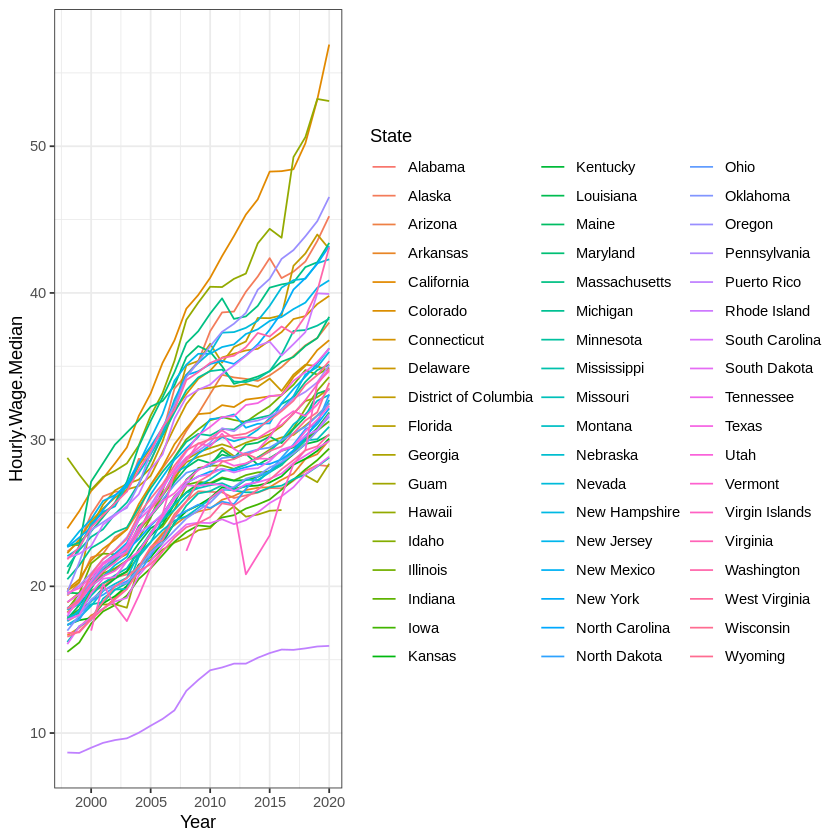

In [7]:
ggplot(nurses)+
    geom_line(aes(x=Year, y=Hourly.Wage.Median, color=State))+
    theme_bw()

In [8]:
nurses$StateLabel = state.abb[match(nurses$State, state.name)]



In [13]:
year2020 = subset(nurses, nurses$Year == 2020)
year2020b =  subset(nurses, nurses$Year == 2020 & nurses$State != "California")
statedifference = abs(year2020$Hourly.Wage.Median - year2020b$Hourly.Wage.Median)
year2020$difference = statedifference


Warning message in year2020$Hourly.Wage.Median - year2020b$Hourly.Wage.Median:
“longer object length is not a multiple of shorter object length”


In [10]:
options(repr.plot.width = 10, repr.plot.height = 20)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“Removed 3 row(s) containing missing values (geom_path).”
Warning message:
“Removed 4 rows containing missing values (geom_text).”


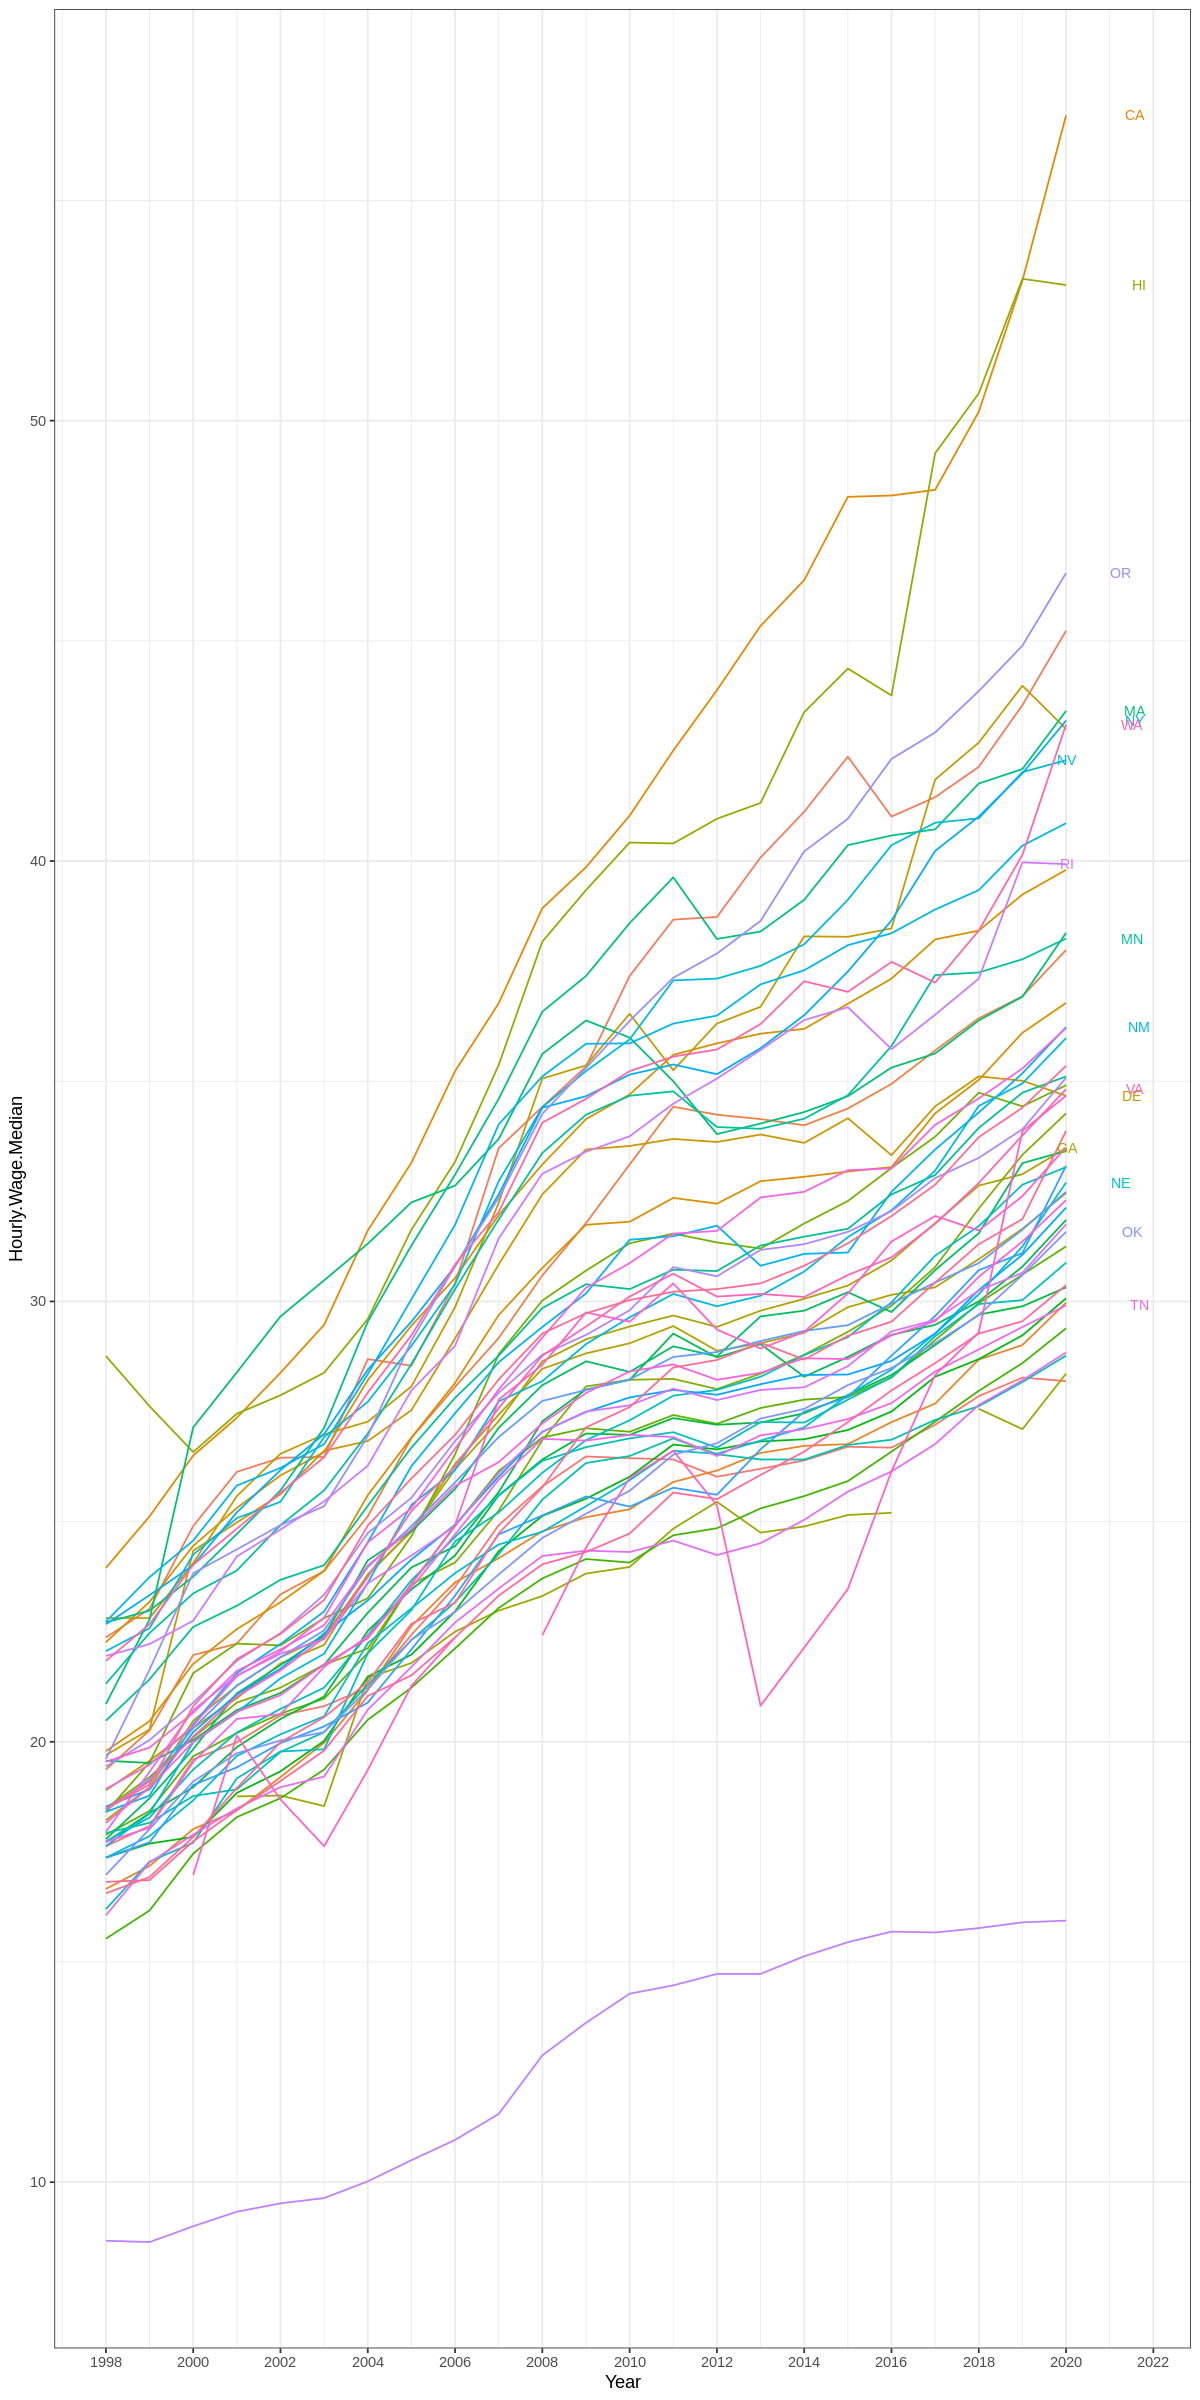

In [11]:
ggplot() + 
  geom_line(data=nurses, aes(x=Year,y=Hourly.Wage.Median, color = State)) +
  geom_text(data = nurses %>% 
                filter(Year == max(Year) & year2020$difference >= 6  ), aes(label = StateLabel, 
                                                           x = Year + runif(5,0,2), 
                                                           y = Hourly.Wage.Median, 
                                                           color = State), size = 3) + 
          guides(color = FALSE) + 
          theme_bw() + 
          scale_x_continuous(breaks = scales::pretty_breaks(10))
          

In [12]:
nurses %>%
  mutate(label = if_else(Year == max(Year), state.abb[match(State, state.name)], NA_character_)) %>%
  ggplot(aes(x = Year, y = Hourly.Wage.Median, color = State)) + 
  geom_line((aes(label = StateLabel),
                  nudge_x = 1,
                  na.rm = TRUE) +
  guides(color = "none") + 
  theme_bw() + 
  scale_x_continuous(breaks = scales::pretty_breaks(10))

ERROR: ignored

In [ ]:
ggplot() + 
  geom_line(data=nurses, aes(x=Year,y=Hourly.Wage.Median, color = State)) +
  geom_text(data = nurses %>% filter(Year == max(Year)), aes(label = State, 
                                                           x = Year + 0.5, 
                                                           y = Hourly.Wage.Median, 
                                                           color = State)) + 
          guides(color = FALSE) + 
          theme_bw() + 
          scale_x_continuous(breaks = scales::pretty_breaks(10))